# Диагностика сердечно сосудестых заболеваний

Цель данного исследования на основе данных о пациенте предположить у него ССЗ.

## Описание даных

### Файлы

Даны три файла:
- sample_submission.csv - образец выходных данных
- test.csv - выборка для получения финальных результатов
- train.csv - выборка для тренировки модели

### Столбцы

0. id - уникальный id пациента
1. age - возраст пациента в днях
2. gender - пол
3. height - рост в см
4. weight - вес в кг
5. ap_hi - верхнее давление 
6. ap_lo - ниэнее дваление
7. cholesterol - уровень халестерина
8. gluc - 
9. smoke - курящий 
10. alco - алкоголик
11. active - активный образ жизни
12. cardio - ССЗ

## Выгрузка данных

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab

In [14]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [4]:
train.sample(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
25578,36504,22922,1,154,78.0,110,70,1,1,0,0,1,1
42067,60083,19942,2,174,95.0,120,80,1,1,0,0,1,1
46029,65747,19783,1,161,72.0,130,80,1,1,0,0,1,1
17178,24550,22807,2,180,80.0,190,1000,1,1,1,0,0,1
33334,47629,17633,1,156,78.0,115,75,1,1,0,0,1,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [15]:
test.sample(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
15572,51940,19685,2,170,75.0,120,80,1,1,0,0,0
22535,75372,16867,1,172,87.0,100,80,1,1,0,0,0
10436,34769,16735,2,175,98.0,110,90,3,1,0,0,1
4516,15063,21895,1,169,89.0,150,90,1,1,0,0,0
13194,43906,16076,1,158,52.0,110,80,2,1,0,0,1


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           30000 non-null  int64  
 1   age          30000 non-null  int64  
 2   gender       30000 non-null  int64  
 3   height       30000 non-null  int64  
 4   weight       30000 non-null  float64
 5   ap_hi        30000 non-null  int64  
 6   ap_lo        30000 non-null  int64  
 7   cholesterol  30000 non-null  int64  
 8   gluc         30000 non-null  int64  
 9   smoke        30000 non-null  int64  
 10  alco         30000 non-null  int64  
 11  active       30000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 2.7 MB


Проверяем на дубликаты, со столбцом `id` и без, для оценик.

In [11]:
train.duplicated().sum()

0

In [10]:
train.drop(['id'],axis=1).duplicated().sum()

24

In [17]:
test.duplicated().sum()

0

In [18]:
test.drop(['id'],axis=1).duplicated().sum()

6

Явных дубликатов нет, а дубликаты без столбца `id` всего 24. Это нормально, что для 70к человек у 24 показатели одинаковые, а для тестовой всего 6 на 30к.

Теперь нужно посмотреть все ли `id` разные.

In [13]:
len(train['id'].unique())

70000

In [19]:
len(test['id'].unique())

30000

Все здорово. Можно идьти дальше.

 ## Распределение данных.

Для корректного обучения модели нужно оценить как распределены данные в тренировочной и тестовой выборках.

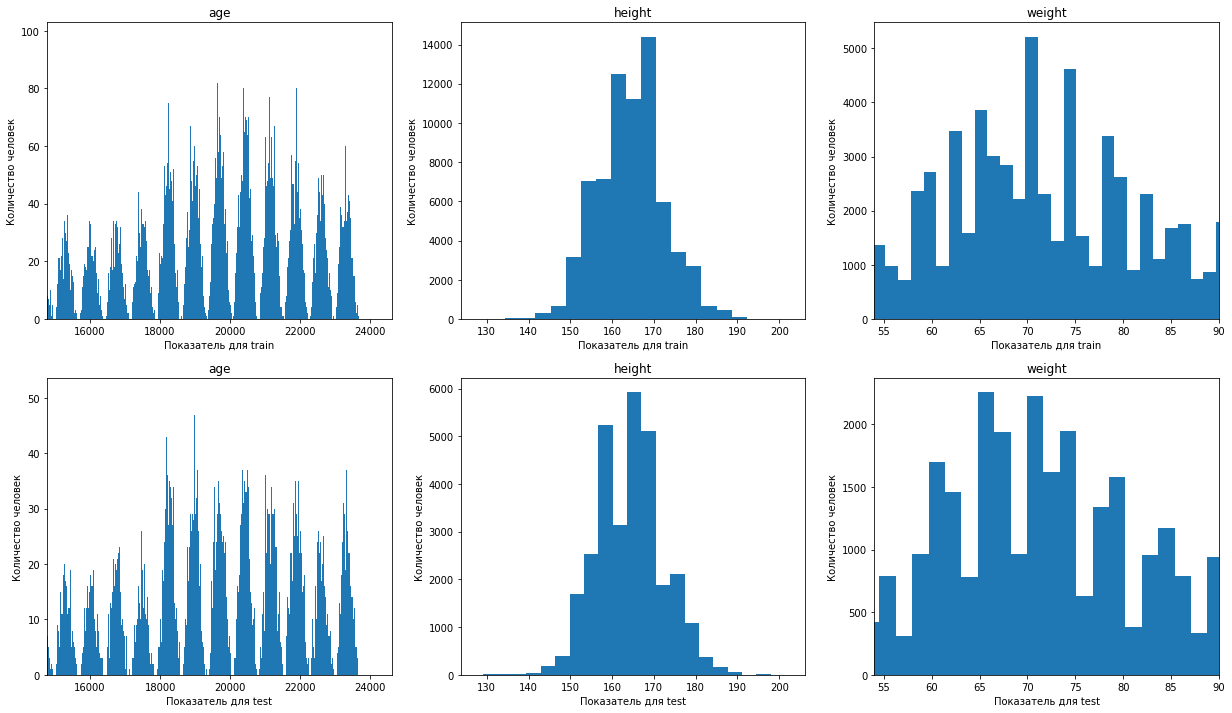

In [87]:
i = 1
fig = plt.figure(figsize=(21, 12))
for df in [train,test]:
    for column in ['age','height','weight']:
        fig.add_subplot(2,3,i).hist(df[column], bins=int(len(df[column].unique())*.5))
        if i < 4: plt.xlabel("Показатель для train")
        else: plt.xlabel("Показатель для test")
        plt.ylabel("Количество человек")
        plt.title(f"{column}")
        plt.xlim(df[column].median()*0.75,df[column].median()*1.25)
        i += 1

Как видно из графиков, распределения возрастов, весов и роста похожи. Теперь можно посмотреть на остальные столбцы.

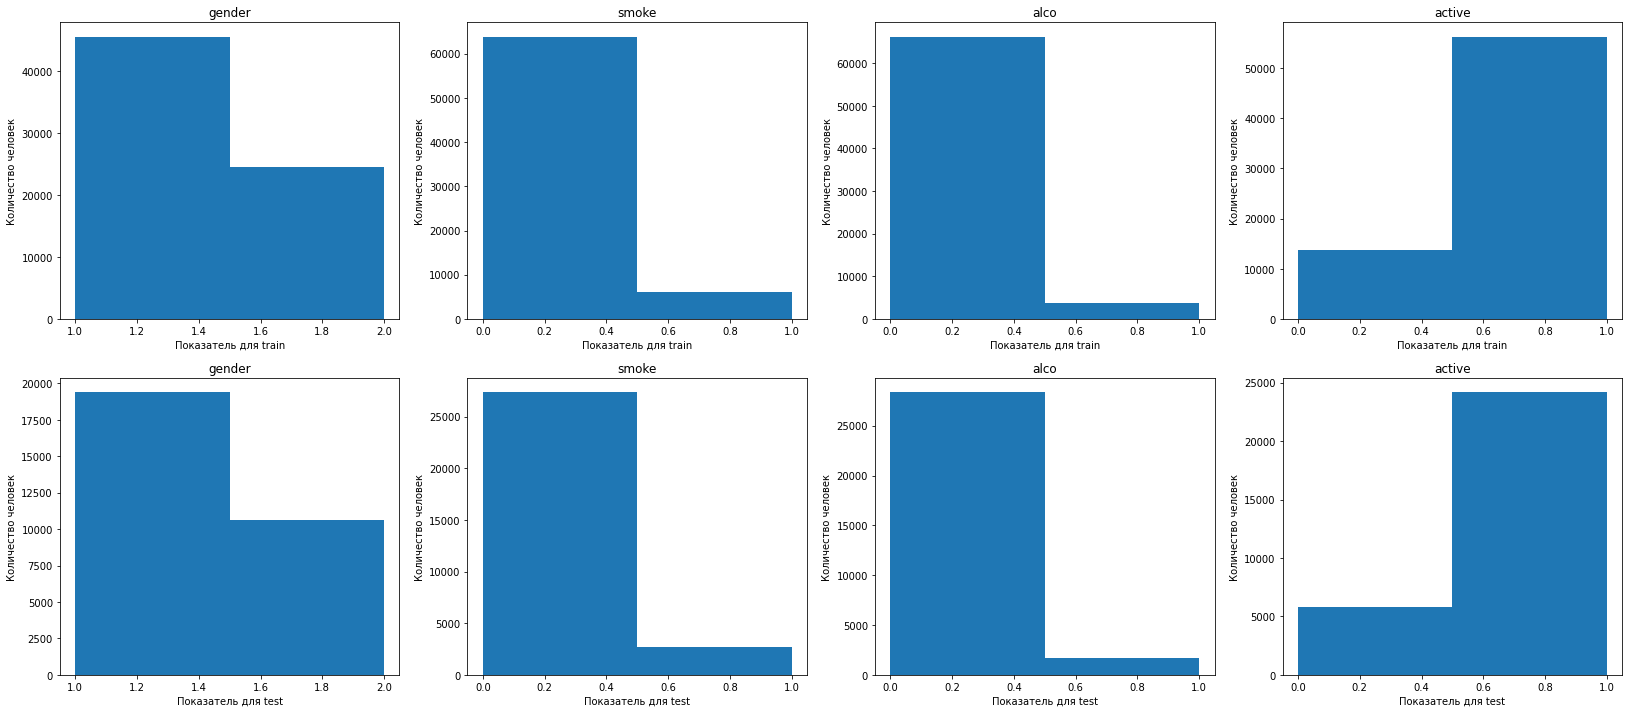

In [88]:
i = 1
fig = plt.figure(figsize=(28, 12))
for df in [train,test]:
    for column in ['gender','smoke','alco','active']:
        fig.add_subplot(2,4,i).hist(df[column],bins = 2)
        if i < 5: plt.xlabel("Показатель для train")
        else: plt.xlabel("Показатель для test")
        plt.ylabel("Количество человек")
        plt.title(f"{column}")
        i += 1

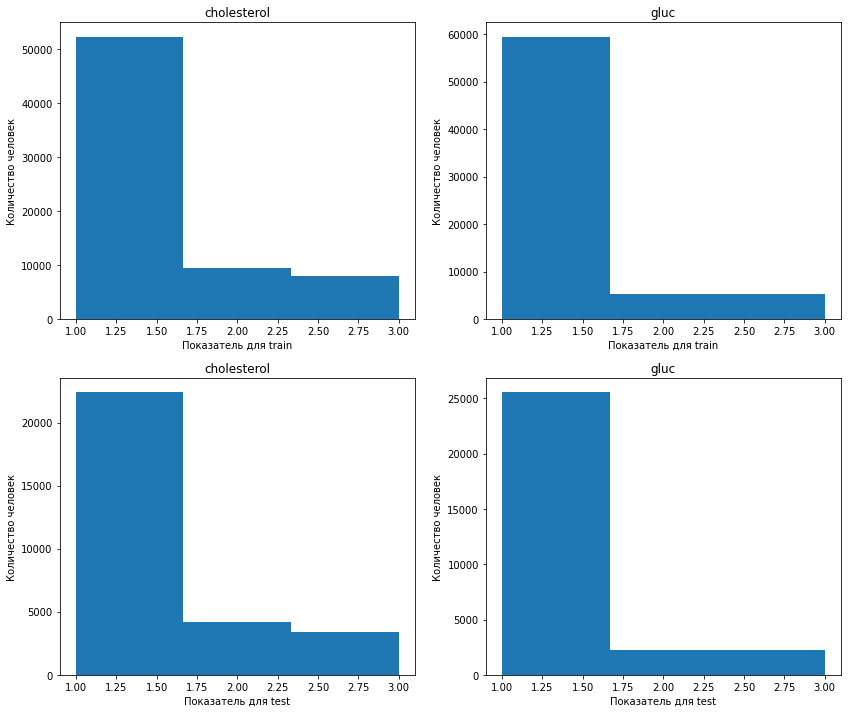

In [97]:
i = 1
fig = plt.figure(figsize=(14, 12))
for df in [train,test]:
    for column in ['cholesterol','gluc']:
        fig.add_subplot(2,2,i).hist(df[column],bins = 3)
        if i < 3: plt.xlabel("Показатель для train")
        else: plt.xlabel("Показатель для test")
        plt.ylabel("Количество человек")
        plt.title(f"{column}")
        i += 1

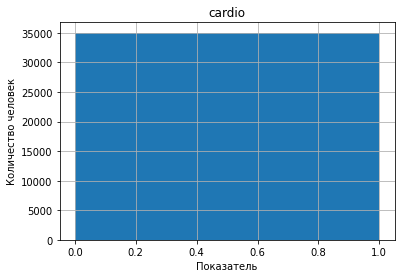

In [128]:
plt.xlabel("Показатель")
plt.ylabel("Количество человек")
plt.title("cardio")
train['cardio'].hist(bins = 2)
plt.show()

Нет дисбаланса в стобце `cardio` это хорошо.

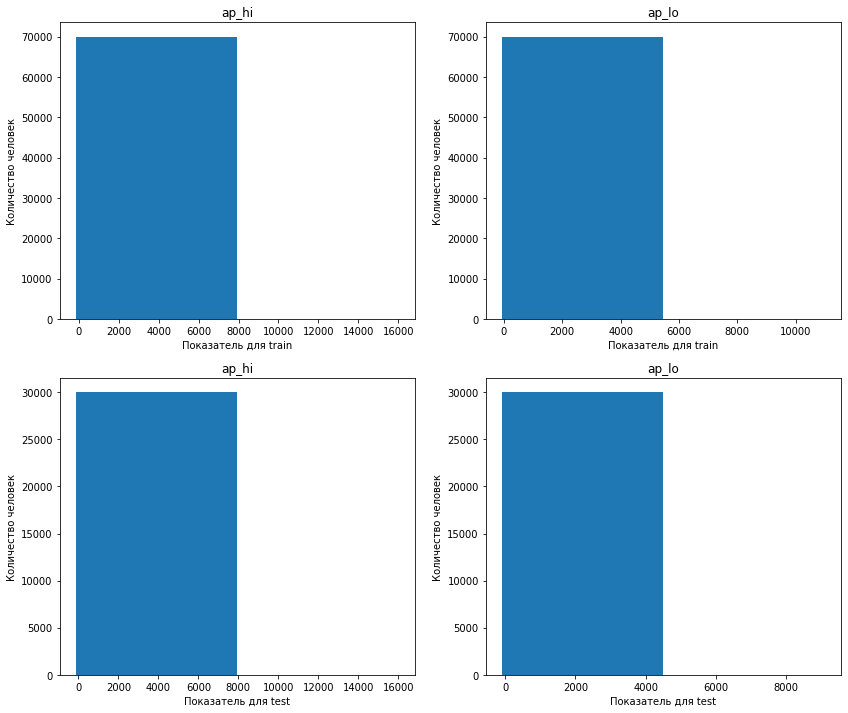

In [89]:
i = 1
fig = plt.figure(figsize=(14, 12))
for df in [train,test]:
    for column in ['ap_hi','ap_lo']:
        fig.add_subplot(2,2,i).hist(df[column],bins = 2)
        if i < 3: plt.xlabel("Показатель для train")
        else: plt.xlabel("Показатель для test")
        plt.ylabel("Количество человек")
        plt.title(f"{column}")
        i += 1

Как видно из графиков, все распределенияв выборках очень похожи, но есть некоторые аномалии в столбцах `ap_hi` и `ap_lo`. Нужно с ними разобраться.

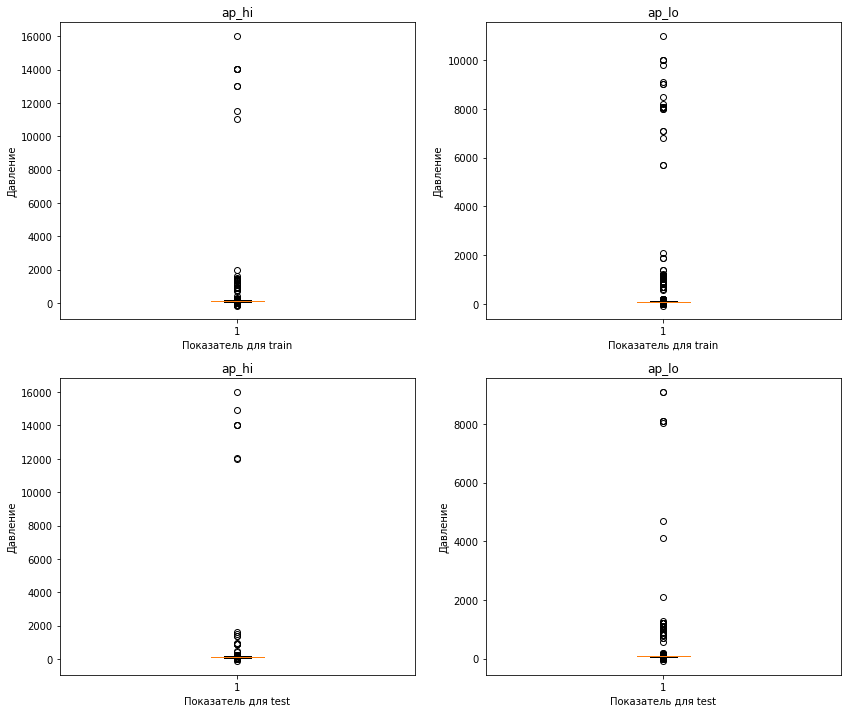

In [117]:
i = 1
fig = plt.figure(figsize=(14, 12))
for df in [train,test]:
    for column in ['ap_hi','ap_lo']:
        fig.add_subplot(2,2,i).boxplot(df[column])
        if i < 3: plt.xlabel("Показатель для train")
        else: plt.xlabel("Показатель для test")
        plt.ylabel("Давление")
        plt.title(f"{column}")
        i += 1

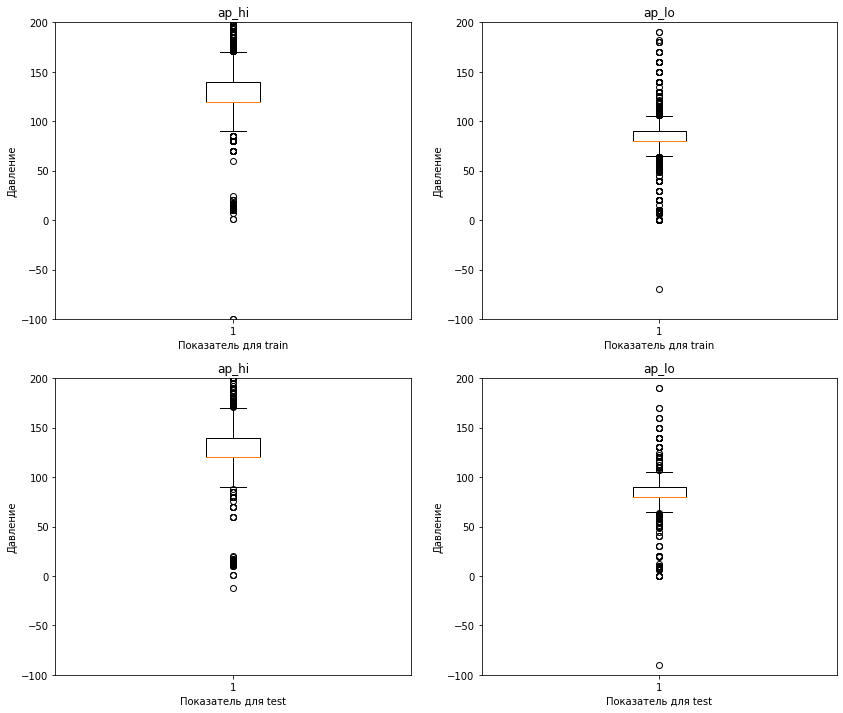

In [118]:
i = 1
fig = plt.figure(figsize=(14, 12))
for df in [train,test]:
    for column in ['ap_hi','ap_lo']:
        fig.add_subplot(2,2,i).boxplot(df[column])
        if i < 3: plt.xlabel("Показатель для train")
        else: plt.xlabel("Показатель для test")
        plt.ylabel("Давление")
        plt.ylim(-100,200)
        plt.title(f"{column}")
        i += 1

Как видно из "коробок с усами" в данных столбцах есть выбросы, причем даже в отрицательную сторону нужно изучить их.

Видно что некоторая часть выбросо выходит за значение 10.000 возможно это по ошибки два давления нзаписали в одну ячейку.

In [107]:
train.loc[train['ap_hi'] > 10000, ['ap_hi','ap_lo']]

,ap_hi,ap_lo
7763,11500,90
25464,14020,80
25519,14020,80
40852,16020,80
46912,14020,90
47253,14020,90
51438,11020,80
55459,13010,80
55847,13010,80


In [108]:
test.loc[test['ap_hi'] > 10000, ['ap_hi','ap_lo']]

,ap_hi,ap_lo
5176,12008,80
7755,14020,90
8852,16020,70
9399,14020,90
13563,14020,80
14449,14900,90
24391,12080,80


Предположение не оправдалось, так как нижнее дваление в норме, а высокое давление не нормально, можно предположить, что высокое замерялось с большей точностью и просто не указали точку в значении. 

In [116]:
(train.loc[train['ap_lo'] > 1000, ['ap_hi','ap_lo']])

,ap_hi,ap_lo
228,160,1100
473,150,1033
649,190,1100
881,150,1100
1033,150,1001
...,...,...
67474,160,1200
68037,170,1100
68288,180,1100
68538,160,10000


In [115]:
test.loc[test['ap_lo'] > 1000, ['ap_hi','ap_lo']]

,ap_hi,ap_lo
644,160,1110
1707,220,1130
1929,1,1099
2647,160,1200
3160,170,4100
...,...,...
29181,190,1100
29396,140,1100
29468,170,1100
29720,200,1100


In [106]:
train['ap_hi'].describe()

count    70000.000000
mean       128.817286
std        154.011419
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

In [119]:
train['ap_lo'].describe()

count    70000.000000
mean        96.630414
std        188.472530
min        -70.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: ap_lo, dtype: float64

In [121]:
test['ap_hi'].describe()

count    30000.000000
mean       130.271300
std        212.501152
min       -130.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

In [120]:
test['ap_lo'].describe()

count    30000.000000
mean        95.689000
std        163.852598
min        -90.000000
25%         80.000000
50%         80.000000
75%         90.000000
max       9100.000000
Name: ap_lo, dtype: float64

Есть несколько способов решить данную проблему:
1. Просто удалить выбросы которые не попадают во второй и третий квартиль. Этот вариант не подходит по скольку тогда останутся люди с хорошим давлением и на них ничему не обучишься.
2. Удалить только 5% выбросов. Отсортировать данные и убрать по 1750 строк сверху и снизу. Тоже не самое лучшее решение, его можно применить в случае если не получится третий способ.
3. Ручками оценить значения выбросов и понять какая у них есть закономерность.

## Работа с выбросами